In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

cnts = pd.read_csv('binfo1-datapack1/read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


In [2]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
# ribosome density change
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN


/data/project/eugeneb/anaconda3/envs/lab/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


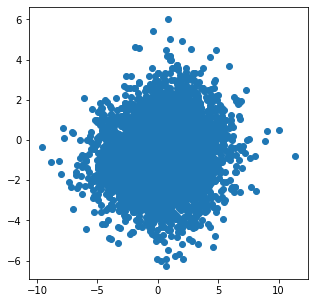

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']))

In [4]:
# location data of genes

#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('mouselocalization-20210507.txt', sep='\t')
mouselocal.head()

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


In [5]:
# merge cnts and mouselocal table on geneid

cnts_loc = cnts[['clip_enrichment', 'rden_change']]
cnts_loc['gene_id'] = cnts_loc.index
cnts_loc['gene_id'] = cnts_loc['gene_id'].str.split('.',expand=True)
df = pd.merge(cnts_loc, mouselocal[['gene_id', 'type']], on='gene_id', how='left')

/data/project/eugeneb/anaconda3/envs/lab/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/data/project/eugeneb/anaconda3/envs/lab/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [6]:
df_im = df[df['type']=='integral membrane']
df_nuc = df[df['type']=='nucleus']
df_cyto = df[df['type']=='cytoplasm']

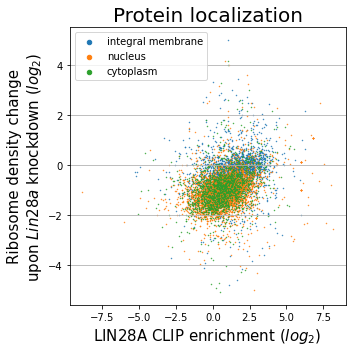

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(df_im['clip_enrichment']),
           np.log2(df_im['rden_change']), s=0.2, label='integral membrane')
ax.scatter(np.log2(df_nuc['clip_enrichment']),
           np.log2(df_nuc['rden_change']), s=0.2, label='nucleus')
ax.scatter(np.log2(df_cyto['clip_enrichment']),
           np.log2(df_cyto['rden_change']), s=0.2, label='cytoplasm')
#ax.axis((-10,10,-,30))
ax.legend(markerscale=10)
ax.grid(axis='y')

ax.set_title('Protein localization', fontsize=20)
ax.set_xlabel('LIN28A CLIP enrichment ($log_{2}$)', fontsize=15)
ax.set_ylabel('Ribosome density change\nupon $\it{Lin28a}$ knockdown ($log_{2}$)', fontsize=15)

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.savefig('termproj1.png', dpi=300)
plt.show()